In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest
from skgof import ks_test, cvm_test, ad_test
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

c:\users\notebook-kharlamov\appdata\local\programs\python\python37-32\lib\site-packages\skgof\ecdfgof.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  from .cvmdist import cvm_unif


### Модульное домашнее задание №2.
#### Задание 1.
Пусть $x_1, x_2, \ldots, x_n$ — выборка из распределения $\mathcal{P}$. 
Хотим проверить гипотезу: $$H_0: \mathcal{P} \sim N(0, 1)$$ с альтернативой $$H_1: \mathcal{P} \sim p \cdot N(0, 1) + (1-p) \cdot N(a, b).$$
где $a,b \in (-1, 1) \times (0, 4)$, так как по понятным причинам невозможно перебрать точки этих интервалов, они аппроксимируются этими же самыми интервалами с шагом $0.1$, начиная с левого конца. 

$\bf{Сам \ вопрос}$: Какой критерий будет мощнее для этих данных, Колмогоров-Смирнов или $\omega^2$?

Реализация $\omega^2$ и Колмогорова-Смирнова взята отсюда: https://pypi.org/project/scikit-gof/, csm_test, ks_test соответственно. 

Для моделирования взяты смеси с параметром $p = 0.3$

In [11]:
def create_sample(a_1=0, a_2=0, var_1=1, var_2=1, n=100, p=0.7):
    X, Y = np.random.normal(a_1, var_1, round(n * p)), np.random.normal(a_2, var_2, round(n * (1-p)))
    data = np.concatenate([X, Y])
    return data

def test(X, alpha=0.01, criterion='ks'):
    if criterion == 'ks':
        result = False if ks_test(X, norm(0, 1)).pvalue > alpha else True
    else:
        result = False if cvm_test(X, norm(0, 1)).pvalue > alpha else True
    return result

def test_p(X, alpha=0.01, criterion='ks'):
    if criterion == 'ks':
        result = ks_test(X, norm(0, 1)).pvalue
    else:
        result = cvm_test(X, norm(0, 1)).pvalue
    return result

def repeat(array, k=1000, p=0.7, criterion='ks'):
    count = []
    for a, var in array:
        tmp_count = 0
        for i in range(k):
            data = create_sample(a_1=a, var_1=var, p=p)
            tmp_count += test(data, criterion=criterion)
        count.append(tmp_count/k)
    return np.array(count)

def get_graphic(x, y, criterion='ks'):
    z = []
    for xx, yy in zip(x,y):
        z.append(repeat(zip(xx, yy), criterion=criterion))
        np.array(z)
    return np.array(z) 

#### Моделирование корректности критериев, проверка равономерности в случае верной $H_0$
#### Видно, что $pvalue$ признаков в случае верной $H_0$ распределены равномерно, значит использования критерия корректно.

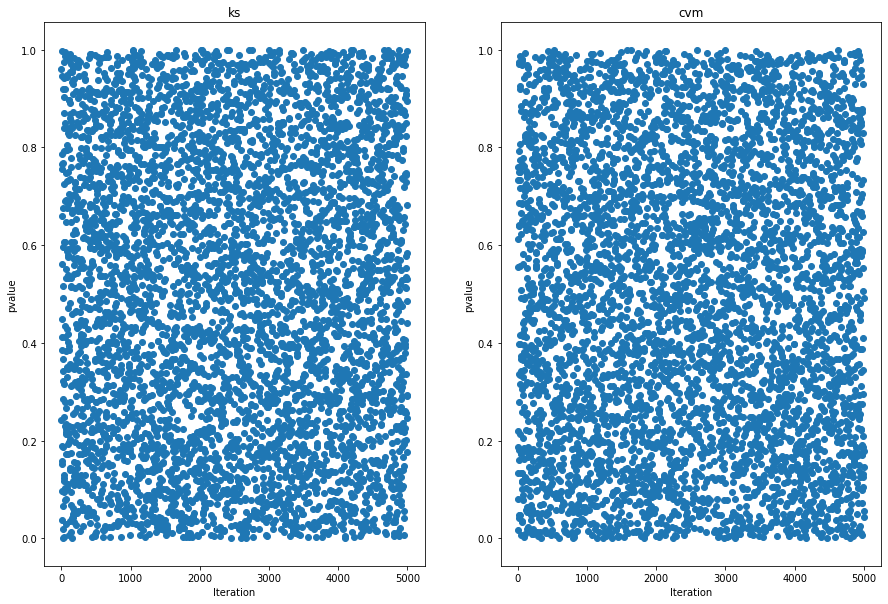

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
for index, criterion in enumerate(['ks', 'cvm']):
    x, y = [], []
    for iteration in range(1, 5000):
        x.append(iteration)
        data = np.concatenate([norm(0, 1).rvs(300), norm(0, 1).rvs(700)])
        y.append(test_p(data, criterion='ks'))
    ax[index].scatter(x, y)
    ax[index].set(xlabel='Iteration', ylabel='pvalue', title=criterion)

In [115]:
# error 2 type: P(H0 | H1)
x, y = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(0.01, 3, 0.2))

#### Моделирование мощностей критериев, ks - Колмогоров-Смирнов, cvm - $\omega^2$.
#### Для моделирования взята область $\text{Expected value, Variance } \in (-1, 1) \times (0, 3)$, с шагом $0.1$ и $0.2$ соответственно.
#### Для каждой точки из данной области подсчитана мощность критерия в результате 100 повторений из выборки размером 100.
#### Трехмерный график изображен линиями уровня, например, уровень $0.1$ означает, что для всех выборок находящихся в этой области мощность критерия меньше $0.1$.
#### Видно, что $\omega^2$ в целом меньше по площади, что означает, что он достигает бОльшей мощности более рано, для наглядности ниже сделана склееная симметричная картинка относительно нулевого математического ожидания.

#### Слева представлен $\omega^2$ справа Колмогоров-Смирнов критерий
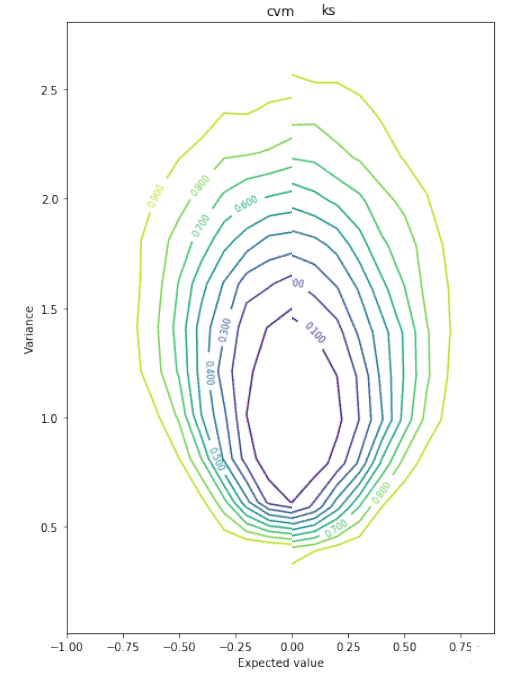

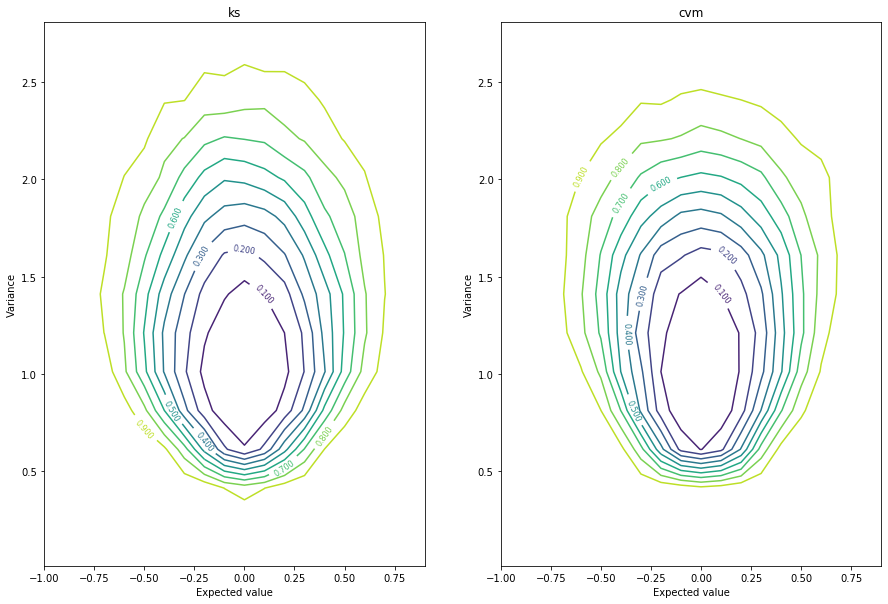

In [116]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

for index, criterion in enumerate(['ks', 'cvm']):
    z = get_graphic(x, y, criterion)
    
    cs = ax[index].contour(x, y, z, levels=10)
    plt.clabel(cs, inline=True, fontsize=8)
    ax[index].set(xlabel='Expected value', ylabel='Variance', title=criterion)
    plt.grid()